# Objetivo

A partir de dados de uma pizzaria retirados do Kaggle, fora feito o tratamento dos dados, e feita a análise de dados.
O objetivo do projeto é responder as seguintes perguntas de negócio:
- Em quais dias e horários costumamos estar mais ocupados?
- Quantas pizzas estamos fazendo durante os períodos de pico?
- Quais são as nossas melhores e as mais vendidas pizzas?
- Qual é o nosso valor médio do pedido?



# Qual o significado de cada varíavel?

- order_id: Identificador único para cada pedido feito por uma tabela

- order_details_id: identificador único para cada pizza colocada em cada pedido (pizzas do mesmo tipo e tamanho são mantidas na mesma linha e a quantidade aumenta)

- pizza_id: identificador de chave exclusivo que vincula a pizza pedida aos seus detalhes, como tamanho e preço

- quantity: Quantidade pedida para cada pizza do mesmo tipo e tamanho

- order_date: Data em que o pedido foi feito (inserido no sistema antes de cozinhar e servir)

- order_time: Hora em que o pedido foi feito (inserido no sistema antes de cozinhar e servir)

- unit_price: Preço da pizza em USD

- total_price: unit_price * quantity

- pizza_size: Tamanho da pizza (Small, Medium, Large, X Large, or XX Large)

- pizza_type: identificador de chave exclusivo que vincula a pizza pedida aos seus detalhes, como tamanho e preço

- pizza_ingredients: ingredientes usados na pizza conforme mostrado no cardápio (todos incluem Queijo Mussarela, mesmo que não 
especificado; e todos incluem Molho de Tomate, a menos que outro molho seja especificado)

- pizza_name: Nome da pizza conforme mostrado no menu

# Carregamento e Entendimento dos Dados

Primeiramente, importei as bibliotecas que usarei ao decorrer do projeto e também fora importado os dados que eu utilizarei.

In [1]:
#Importando Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import date, datetime
pd.set_option('display.max_columns',25)
cores = ['darkcyan','palevioletred','darkkhaki','lightsalmon','cadetblue']

In [2]:
#Importando os dados
df = pd.read_excel(r"Data Model - Pizza Sales.XLSX")

Consultei a minha base de dados, afim de compreender os dados que tenho, e como os manipularei para extrair valor deles. 

In [3]:
#Observando minha base de dados
display(df)

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [4]:
#Verificando as métricas dos dados
df.describe()

,order_details_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [5]:
#Verificando o tipo de cada coluna
df.dtypes

order_details_id              int64
order_id                      int64
pizza_id                     object
quantity                      int64
order_date           datetime64[ns]
order_time                   object
unit_price                  float64
total_price                 float64
pizza_size                   object
pizza_category               object
pizza_ingredients            object
pizza_name                   object
dtype: object

In [6]:
#Verificando se há valor nulo
df.isnull().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

Após entender melhor os dados, partir para a resolução das perguntas de negócio

# Perguntas do négocio

# 1 - Em quais dias e horários costumamos estar mais ocupados?

Inicialmente, responderemos a seguinte pergunta: Em quais dias costumamos estar mais ocupados. Para responder está pergunta, criei uma nova coluna na minha base de dados ("order_day"), que são os dias sendo identificados pelo nome. Em seguida, contei a quantidade de pedidos feitos por cada dia e desenhei o gráfico

In [7]:
#Mudando a coluna Order_Day de Dia do mes para o nome dos dias da semana
df["order_day"] = df["order_date"].dt.day_name()
#Contando a quantidade de pedidos por dia da semana
QuantityperWeek = df["order_day"].value_counts()

In [8]:
#Fazendo um loop "for" para plotar um gráfico a partir de um dicionário de maneira decrescente
i = 0
keys = []
values = []

for i in QuantityperWeek.index:
    keys.append(i)

for i in QuantityperWeek:
    values.append(i)
      
DicPerWeek = {}
DicPerWeek = {key : value for key, value in zip(keys, values)}
print(DicPerWeek)

{'Friday': 8106, 'Saturday': 7355, 'Thursday': 7323, 'Wednesday': 6797, 'Tuesday': 6753, 'Monday': 6369, 'Sunday': 5917}


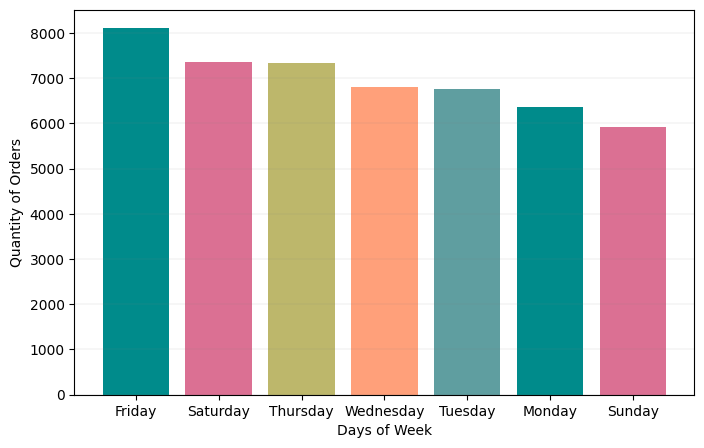

In [9]:
#Plotando o gráfico
plt.figure(figsize = (8,5))
plt.bar(DicPerWeek.keys(), DicPerWeek.values(), color = cores)
plt.ylabel("Quantity of Orders")
plt.xlabel("Days of Week")
plt.grid(axis='y',color='gray', linewidth=0.1)
plt.show()

De acordo com o gráfico, observamos que os dias com a maior quantidade de pedido foram as Sextas-Feiras e os Sabados. O que é totalmente tolerável, considerando que são dias do final da semana, aumentando consideravelmente a quantidade de pedidos.

Agora, verificarei se as Sextas-Feiras e os sábados são dias com mais pedidos em todos os meses do ano

In [10]:
# Criando uma nova coluna com os mes sendo identificados pelos nomes
df['order_namemonth'] = df['order_date'].dt.month_name()

In [11]:
# Transformando a coluna "order_date" em string
df['order_date'] = df['order_date'].astype(str)
# Transformando a coluna "order_month" em Ano-Mes, para deixar meu gráfico ordenado em ordem cronológica
df['order_month']  = df['order_date'].apply(lambda x: dt.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))

In [12]:
# Criando uma tabela com os valores somados de (order_month, order_day, quantity)
quantifybymonth = df.groupby(['order_month','order_day'])['quantity'].sum().reset_index()
quantifybymonth

,order_month,order_day,quantity
0,2015-01,Friday,740
1,2015-01,Monday,499
2,2015-01,Saturday,716
3,2015-01,Sunday,446
4,2015-01,Thursday,735
...,...,...,...
78,2015-12,Saturday,521
79,2015-12,Sunday,487
80,2015-12,Thursday,676
81,2015-12,Tuesday,581


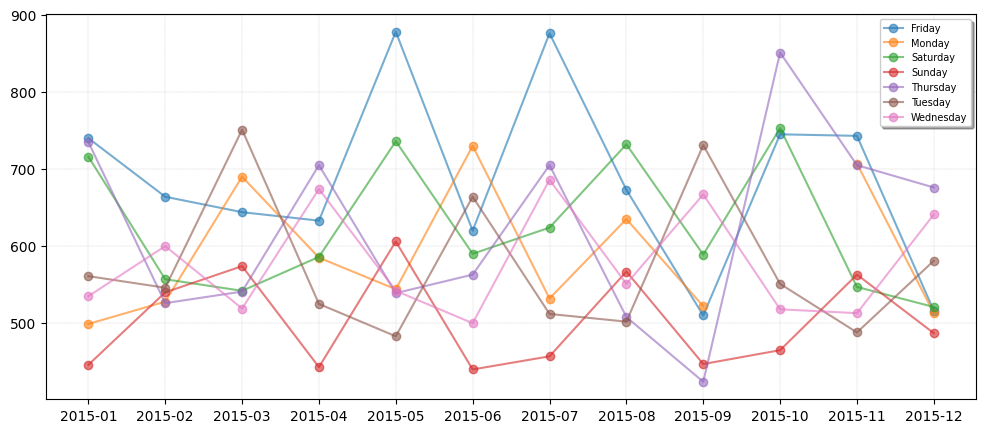

In [13]:
# Plotando um gráfico de linha
plt.figure(figsize = (12,5))
plt.plot(df.groupby(['order_month','order_day'])['quantity'].sum().unstack(),  alpha = .6,  marker = "o")
plt.grid(linestyle='--',linewidth = 0.2)
plt.legend(quantifybymonth['order_day'],shadow= True,fontsize = 7)
plt.show()

A partir do gráfico, podemos observar que não são todos os meses em que as sextas-feiras e os sabados são os dias com mais pedidos, um dos motivos que pode explicar isto são os feriados. 

Neste momento, irei responder a segunda parte da pergunta: "Em quais horarios costumamos estar mais ocupados?".

Para responder está pergunta, eu separei o horário em 3 colunas ("Hora, Minutos e Segundos"), e utilizarei somente a coluna "Hora" para estar verificando os horarios em que se teve mais pedidos.

In [14]:
# Transformando a coluna em string
df["order_time"] = df["order_time"].astype("string")
# Criando 3 novas colunas: (Hora,Minutos,Segundos)
df[["hour","minute","second"]] = df["order_time"].str.split(":",expand=True)

In [15]:
# Somando a quantidade de pedidos por hora
QuantityPerHour = df.hour.value_counts().sort_index()
QuantityPerHour

09       4
10      17
11    2672
12    6543
13    6203
14    3521
15    3170
16    4185
17    5143
18    5359
19    4350
20    3487
21    2528
22    1370
23      68
Name: hour, dtype: Int64

Pode-se analisar que o horário de funcionamento do estabelecimento é de 9h às 23h. 

In [16]:
#Fazendo novamente um loop "for" para plotar um gráfico a partir de um dicionário de maneira que o horario fique crescente
i = 0
keys2 = []
values2 = []

for i in QuantityPerHour.index:
    keys2.append(i)

for i in QuantityPerHour:
    values2.append(i)
      
DicPerHour = {}
DicPerHour = {key2 : value2 for key2, value2 in zip(keys2, values2)}
print(DicPerHour)

{'09': 4, '10': 17, '11': 2672, '12': 6543, '13': 6203, '14': 3521, '15': 3170, '16': 4185, '17': 5143, '18': 5359, '19': 4350, '20': 3487, '21': 2528, '22': 1370, '23': 68}


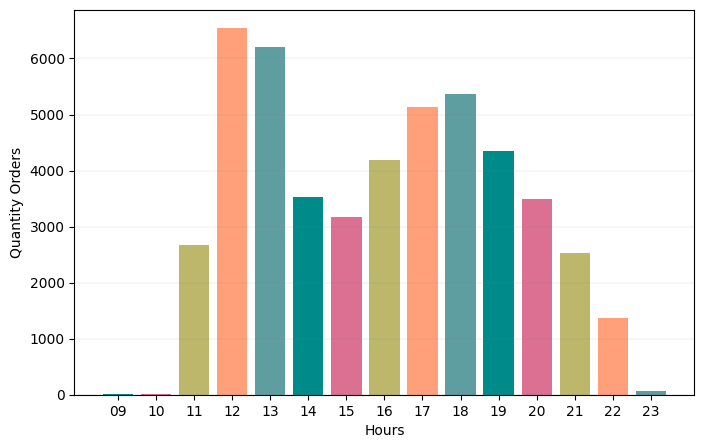

In [17]:
# Plotando o gráfico
plt.figure(figsize = (8,5))
plt.bar(DicPerHour.keys(), DicPerHour.values(), color = cores)
plt.xlabel("Hours")
plt.ylabel("Quantity Orders")
plt.grid(axis='y',color='gray', linewidth=0.1)
plt.show()

A partir do gráfico, podemos verificar que entre às 12:00 e 14:00 são os horarios que mais recebem pedidos, tendo um total de 12746 pedidos neste horário.

Em seguida, o outro horário que recebem mais pedidos é entre às 17:00 e 19:00. Sendo um total de 10502 pedidos.

# Quantas pizzas estamos fazendo durante os períodos de pico?

A seguir, desenharei um gráfico de linha, mostrando o total de pizzas vendidas no período de um ano (01-2015 / 12-2015).

In [18]:
# Somando a quantidade de pedidos por mês
df.groupby('order_namemonth')['quantity'].sum().sort_values(ascending=False)

order_namemonth
July         4392
May          4328
November     4266
March        4261
January      4232
August       4168
April        4151
June         4107
February     3961
December     3935
September    3890
October      3883
Name: quantity, dtype: int64

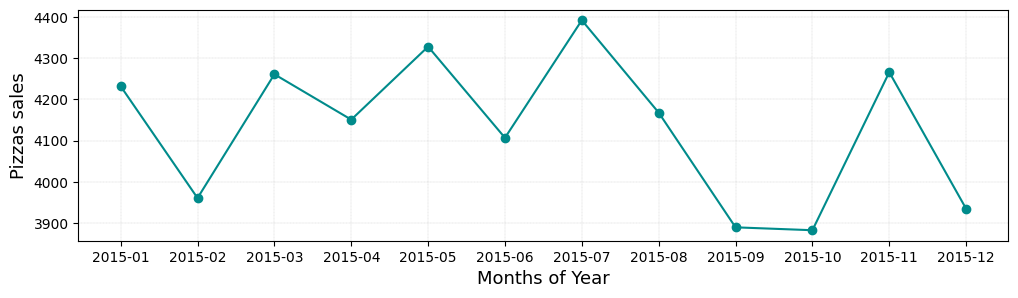

In [19]:
# Plotando o gráfico
plt.figure(figsize=(12,3))
plt.plot(df.groupby('order_month')['quantity'].sum(), color = 'darkcyan',marker = "o")
plt.grid(linestyle='--',linewidth = 0.2)
plt.xlabel('Months of Year', fontsize = 13)
plt.ylabel('Pizzas sales',fontsize = 13)
plt.show()

A partir do gráfico, podemos verificar que os meses de pico foram o mês de Julho com 4392 pizzas vendidas e o mês de Maio com 4328 pizzas vendidas. E os meses de baixa, foram os meses de Setembro e Outubro, sendo sequencialmente, 3890 e 3883 pizzas vendidas. 

Porém, foi uma queda normal, devido a sazonalidade, pois a baixa em relação ao pico foi de apenas 11.5%

# Quais são as nossas melhores e mais vendidas pizzas?

Primeiramente, responderei quais são as categorias de pizzas mais vendidas e sequencialmente responderei quais as pizzas mais vendidas. 

Para responder quais as categorias mais vendidas. Inicialmente, fiz a contagem da quantidade de pedidos por categoria, para ser possível a plotagem do gráfico. Posteriormente, fiz a contagem da quantidade de pedidos por mês e categoria e desenhei ambos gráficos

In [20]:
# Contando a quantidade de pedidos por categoria
pizzascategory = df.groupby('pizza_category')['quantity'].sum().reset_index()
pizzascategory

,pizza_category,quantity
0,Chicken,11050
1,Classic,14888
2,Supreme,11987
3,Veggie,11649


In [21]:
# Verificando a quantidade de pedido por categoria
categorybymonth = df.groupby(['order_month','pizza_category'])['quantity'].sum().unstack()
categorybymonth

pizza_category,Chicken,Classic,Supreme,Veggie
order_month,,,,
2015-01,913,1257,1044,1018
2015-02,875,1178,964,944
2015-03,994,1236,991,1040
2015-04,924,1253,1013,961
2015-05,939,1324,1045,1020
2015-06,910,1199,1040,958
2015-07,963,1331,1041,1057
2015-08,934,1283,991,960
2015-09,900,1202,877,911


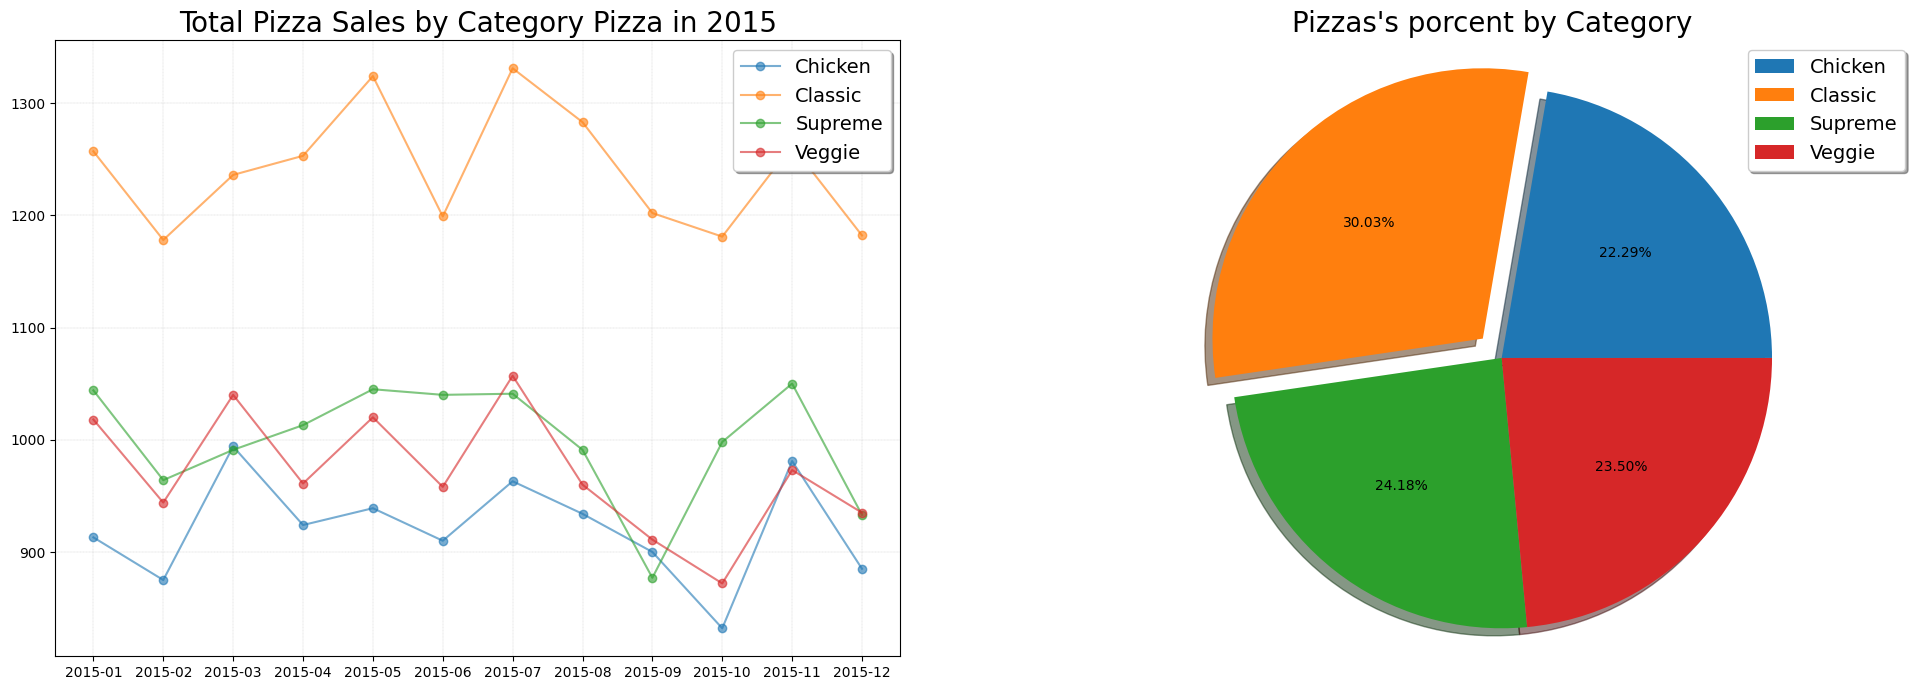

In [22]:
#Plotando dois gráficos
plt.figure(figsize = (24, 8))
plt.subplot(1, 2, 1)
plt.plot(df.groupby(['order_month','pizza_category'])['quantity'].sum().unstack(),  alpha = .6,   marker = "o")
plt.title('Total Pizza Sales by Category Pizza in 2015',fontsize = 20)
plt.grid(linestyle='--',linewidth = 0.2)
plt.legend(pizzascategory['pizza_category'],shadow= True,fontsize = 14)

plt.subplot(1, 2, 2)
plt.pie(pizzascategory['quantity'], 
        shadow =  True,
        explode = (0, 0.1, 0, 0),
        autopct= '%.2f%%')
plt.legend(labels = pizzascategory['pizza_category'],fontsize = 14, shadow= True)
plt.title("Pizzas's porcent by Category",fontsize = 20)

plt.axis("equal")
plt.show()


A partir do gráfico, podemos analizar que a categoria Pizzas Classicas são as mais vendidas, sendo 30% de todas as pizzas vendidas. Em seguida, a quantidade de vendidas em ordem são: Pizzas Supremas, Pizzas Veganas e Pizzas de Frango

A fim de responder quais os nomes das pizzas mais vendidas, primordialmente, realizei a contagem da quantidade de pizza por nome das pizzas e desenhei um gráfico de barras na horizontal para melhorar a vizualização

In [23]:
# Verificando a quantidade de pizza por nome
salespername = df.groupby(['pizza_name'])['quantity'].sum().sort_values().reset_index()
salespername

,pizza_name,quantity
0,The Brie Carre Pizza,490
1,The Mediterranean Pizza,934
2,The Calabrese Pizza,937
3,The Spinach Supreme Pizza,950
4,The Soppressata Pizza,961
5,The Spinach Pesto Pizza,970
6,The Chicken Pesto Pizza,973
7,The Italian Vegetables Pizza,981
8,The Chicken Alfredo Pizza,987
9,The Green Garden Pizza,997


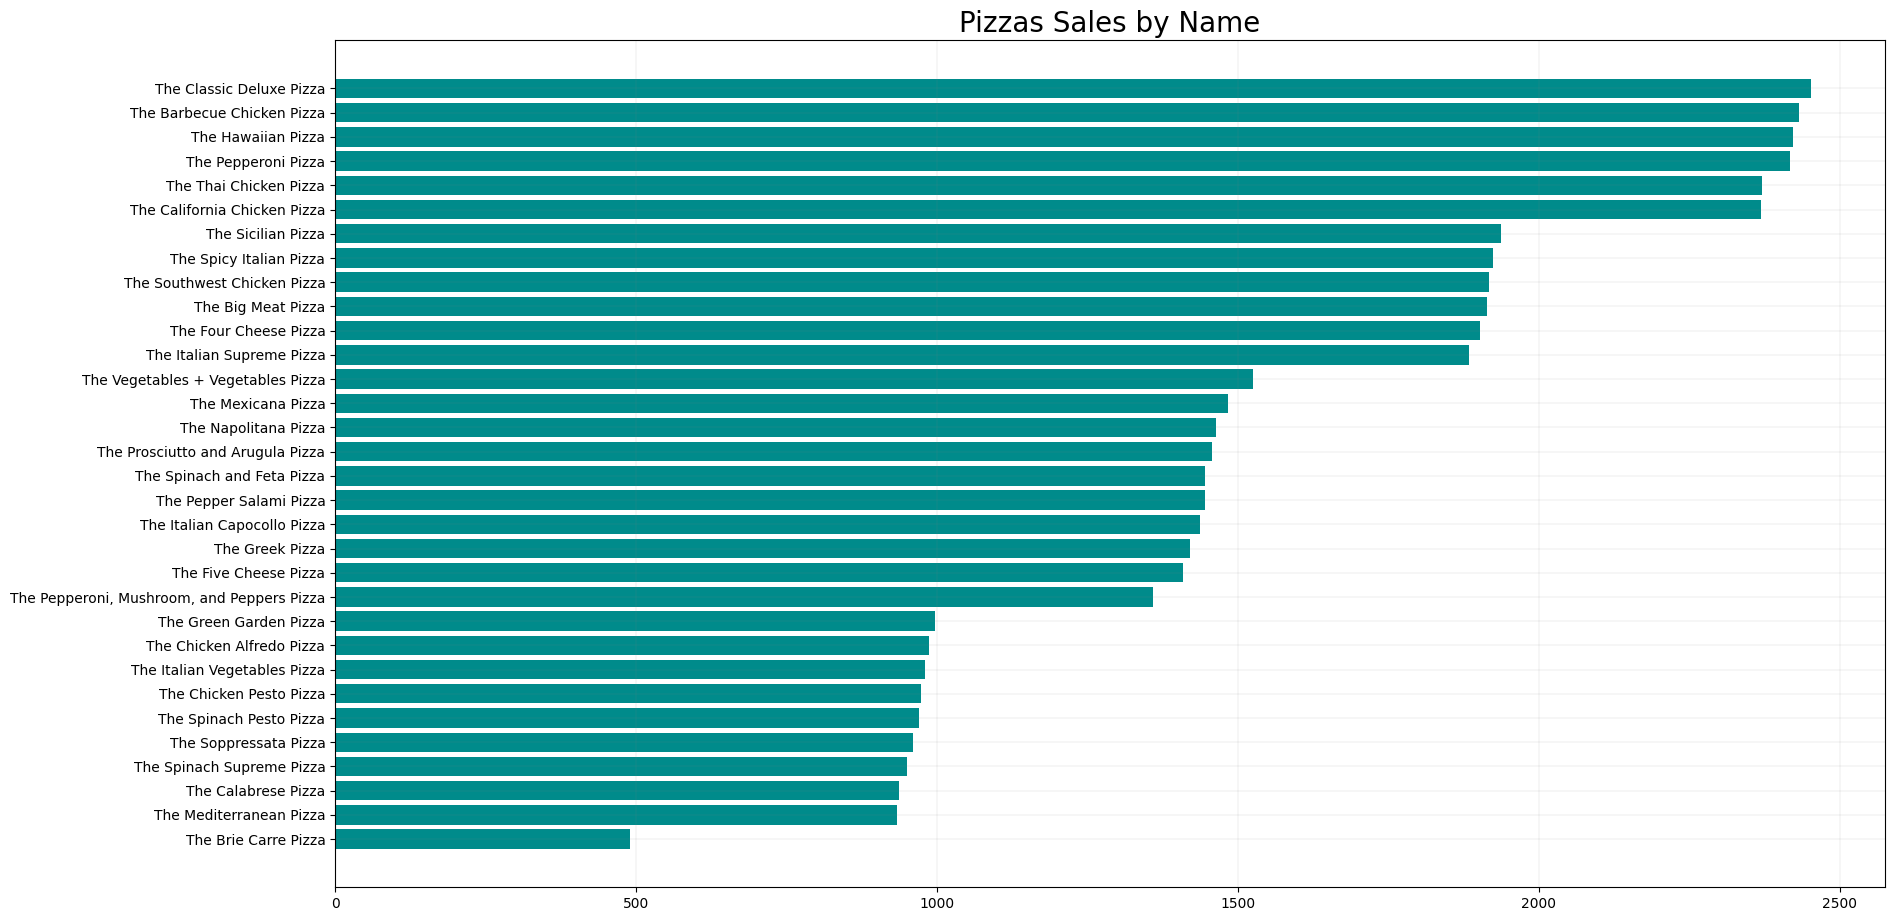

In [24]:
# Plotando um gráfico de barra
plt.figure(figsize=(20,11))
plt.barh(salespername['pizza_name'], salespername['quantity'], color = 'darkcyan')
plt.title('Pizzas Sales by Name',fontsize = 20)
plt.grid(color='gray', linewidth=0.1)

A partir do gráfico, podemos analizar que a pizza mais vendida é a pizza de "The Classic Deluxe Pizza", entretando outras pizzas foram pedidas tanto quanto, que são as pizzas: The California Chicken Pizza, The Thai Chicken Pizza, The Pepperoni Pizza,The Barbecue Chicken Pizza.




# Qual é o nosso valor médio do pedido?

Para responder a última pergunta, eu calculei alguns valores e criei 3 novas tabelas para responder: "Valor médio dos pedidos","Valor médio dos pedidos por categoria" e "Valor médio dos pedidos por mês"

 - VALOR MEDIO DOS PEDIDOS

In [25]:
# Criando os valores

totalprice = [df['total_price'].sum()]
totalquantity = [df['quantity'].sum()]
ordernumber = [df['order_id'].max()]
average = [df['total_price'].sum()/df['order_id'].max()]

# Criando uma tabela com as seguintes colunas ("Orders","Total Pizza Sales", "Total Price", "Average Order Value")

infosales = pd.DataFrame(list(zip(ordernumber, totalquantity, totalprice, average)))
infosales.columns = ['Orders', 'Total Pizza Sales', 'Total Price', 'Average Order Value']
infosales

,Orders,Total Pizza Sales,Total Price,Average Order Value
0,21350,49574,817860.05,38.307262


- VALOR MÉDIO DOS PEDIDOS POR CATEGORIA

In [26]:
# Criando os valores
total_orderbycategory = df.groupby('pizza_category')['order_id'].nunique().reset_index()
total_pizzabycategory = df.groupby('pizza_category')['quantity'].sum().reset_index()
total_pricebycategory = df.groupby('pizza_category')['total_price'].sum().reset_index()
averagebycategory = (total_pricebycategory['total_price']/total_orderbycategory['order_id'])

In [27]:
# Criando uma tabela com as seguintes colunas ("Category","Orders", "Total preço", "Total Pizza Sales", "Average Order Value")

resume_salesbycategory = pd.DataFrame(zip(total_orderbycategory.pizza_category, total_orderbycategory.order_id, total_pizzabycategory.quantity, total_pricebycategory.total_price, averagebycategory))
resume_salesbycategory.columns = ['Category','Orders', 'Total Pizza Sales', 'Total Price', 'Average Order Value']
resume_salesbycategory

,Category,Orders,Total Pizza Sales,Total Price,Average Order Value
0,Chicken,8536,11050,195919.50,22.952144
1,Classic,10859,14888,220053.10,20.264582
2,Supreme,9085,11987,208197.00,22.916566
3,Veggie,8941,11649,193690.45,21.663175


- VALOR MEDIO DOS PEDIDOS POR MÊS

In [28]:
total_orderbymonth = df.groupby('order_month')['order_id'].nunique().reset_index()
total_pizzabymonth = df.groupby('order_month')['quantity'].sum().reset_index()
total_pricebymonth = df.groupby('order_month')['total_price'].sum().reset_index()
averagebymonth = (total_pricebymonth['total_price']/total_orderbymonth['order_id'])

# Criando uma tabela com as seguintes colunas ("Month of Year","Orders", "Total Pizza Sales", "Total Price","Average Order Value")
resume_salesbymonth = pd.DataFrame(zip(total_orderbymonth.order_month, total_orderbymonth.order_id, total_pizzabymonth.quantity, total_pricebymonth.total_price, averagebymonth))
resume_salesbymonth.columns = ['Month of Year','Orders', 'Total Pizza Sales', 'Total Price', 'Average Order Value']
resume_salesbymonth

,Month of Year,Orders,Total Pizza Sales,Total Price,Average Order Value
0,2015-01,1845,4232,69793.30,37.828347
1,2015-02,1685,3961,65159.60,38.670386
2,2015-03,1840,4261,70397.10,38.259293
3,2015-04,1799,4151,68736.80,38.208338
4,2015-05,1853,4328,71402.75,38.533594
5,2015-06,1773,4107,68230.20,38.482910
6,2015-07,1935,4392,72557.90,37.497623
7,2015-08,1841,4168,68278.25,37.087588
8,2015-09,1661,3890,64180.05,38.639404
9,2015-10,1646,3883,64027.60,38.898906


# Hipóteses

A fim de tornar o projeto mais completo, foram inseridas algumas hipóteses para ajudar com insights

- Hipótese 1: Os pedidos nos sabados dão 10% a mais de lucro do que os pedidos das sextas-feiras.

In [29]:
# Calculuando o total de preço por dia, total de preço por pedido e o preço por pedido
totalpricebyday = df.groupby('order_day')[['total_price']].sum().reset_index()
totalordersbyday = df.groupby('order_day')[['quantity']].sum().reset_index()
pricebyorder = (totalpricebyday['total_price'] / totalordersbyday['quantity'])
pricebyorder

0    16.509816
1    16.550432
2    16.439664
3    16.438028
4    16.518922
5    16.553125
6    16.471120
dtype: float64

In [30]:
# Foi criada uma tabela com as informações das sextas-feiras e sabados. Esta tabela foi criada com as seguintes colunas: 
# "Dias da Semana","Quantidade de Pedidos","Preço Total", "Preço por Pedido"
info_fridayandsaturday = pd.DataFrame(zip(totalpricebyday.order_day,totalordersbyday.quantity,
                                          totalpricebyday.total_price,pricebyorder))
info_fridayandsaturday.columns = ['Days of Week', 'Orders Quantity', 'Total Price','Price/Order']
info_fridayandsaturday.drop([1,3,4,5,6], inplace=True)
info_fridayandsaturday

,Days of Week,Orders Quantity,Total Price,Price/Order
0,Friday,8242,136073.9,16.509816
2,Saturday,7493,123182.4,16.439664


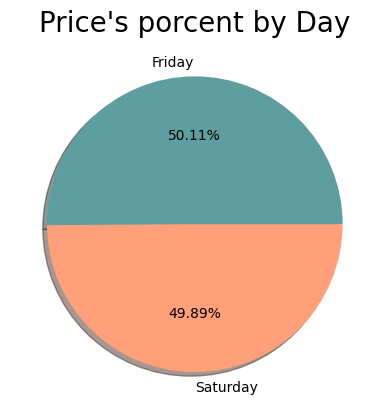

In [31]:
# Desenhando um gráfico de pizza
plt.pie(info_fridayandsaturday['Price/Order'], labels = info_fridayandsaturday['Days of Week'], 
        shadow =  True,
        autopct= '%.2f%%',
        colors = ['cadetblue','lightsalmon'])
plt.title("Price's porcent by Day",fontsize = 20)

plt.show()

Ou seja, rejeitaremos a hipótese, pois de acordo com os dados não há diferença considerável entre o valor das pizzas vendidas nas sextas-feiras e nos sabados

- Hipotese 2: O período da tarde é o periodo em que mais faturam, faturando cerca de 15% a mais que os outros

In [32]:
# Somando o faturamento de acordo com a hora
periodo = df.groupby('hour')[['total_price']].sum().reset_index()
periodo

,hour,total_price
0,09,83.00
1,10,303.65
2,11,44935.80
3,12,111877.90
4,13,106065.70
5,14,59201.40
6,15,52992.30
7,16,70055.40
8,17,86237.45
9,18,89296.85


In [33]:
# Verificando o faturamento de acordo com o período
Manha = periodo['total_price'][[0,1,2,3,4]].sum()
Tarde = periodo['total_price'][[5,6,7,8,9]].sum()
Noite = periodo['total_price'][[10,11,12,13,14]].sum()
print(Manha,Tarde,Noite)

263266.05 357783.4 196810.59999999998


In [34]:
# Transformando a coluna em string
df["order_time"] = df["order_time"].astype("string")
# Criando 3 novas colunas: (Hora,Minutos,Segundos)
df[["hour","minute","second"]] = df["order_time"].str.split(":",expand=True)

In [34]:
# Criando uma tabela com o Período e o Total Faturado
Periodo = pd.DataFrame({'Periodo': ['Manha','Tarde','Noite'],
                        'Total Faturado': [263266.05,357789.4,196810.6]})
Periodo

,Periodo,Total Faturado
0,Manha,263266.05
1,Tarde,357789.40
2,Noite,196810.60


In [35]:
# Somando a quantidade de pedidos por hora
QuantityPerHour = df.hour.value_counts().sort_index()
QuantityPerHour

09       4
10      17
11    2672
12    6543
13    6203
14    3521
15    3170
16    4185
17    5143
18    5359
19    4350
20    3487
21    2528
22    1370
23      68
Name: hour, dtype: Int64

In [35]:
# 
print((Periodo['Total Faturado'][0]/Periodo['Total Faturado'][1])*100)
print((Periodo['Total Faturado'][2]/Periodo['Total Faturado'][1])*100)

73.58128832212468
55.00738702711707


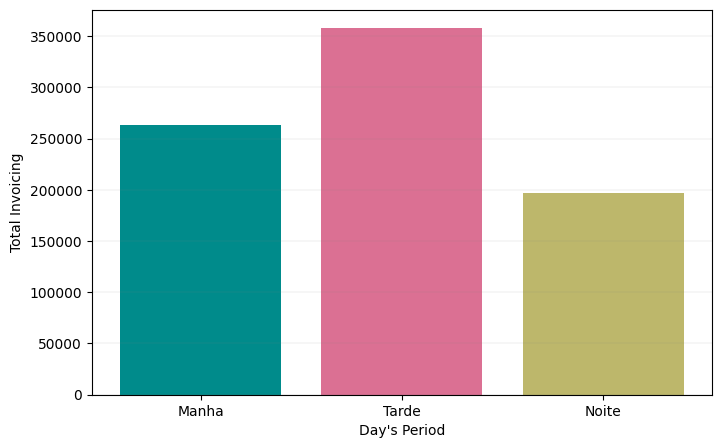

In [36]:
# Desenhando o gráfico de barras
plt.figure(figsize = (8,5))
plt.bar(Periodo['Periodo'],Periodo['Total Faturado'], 
        color = cores)
plt.ylabel("Total Invoicing")
plt.xlabel("Day's Period")
plt.grid(axis='y',color='gray', linewidth=0.1)
plt.show()

Como mostra o gráfico, o período da tarde é o período com mais faturamento, faturando cerca de 1.36x do que o período da manha e quase 1.82x a mais do que o período da noite. 

Passando para porcentagem, o período da tarde fatura 26.42% a mais do que o período da manhã e 45.00% a mais do que o período da noite.

- Hipotese 3: A pizza grande (Large)  mesmo quando é a pizza menos pedida da categoria, mesmo assim é a que mais fatura, faturando 10% a mais que as demais

In [37]:
# Verificando a quantidade e preço das pizzas vendidas por categoria e tamanho
df[['pizza_category', 'pizza_size', 'quantity','total_price']].groupby(['pizza_category','pizza_size']).sum()

quantity  total_price
pizza_category pizza_size                       
Chicken        L               4932    102339.00
               M               3894     65224.50
               S               2224     28356.00
Classic        L               4057     74518.50
               M               4112     60581.75
               S               6139     69870.25
               XL               552     14076.00
               XXL               28      1006.60
Supreme        L               4564     94258.50
               M               4046     66475.00
               S               3377     47463.50
Veggie         L               5403    104202.70
               M               3583     57101.00
               S               2663     32386.75

Como podemos ver, a pizza clássica pequena vendeu quase 1.5x ou 33.91% a mais do que a pizza clássica grande. 

Porém, faturou apenas 69870.25, enquanto a pizza grande faturou 74518.50, ou seja, o faturamento com a pizza grande foi 1.23x ou 18,70% maior do que a pizza pequena.

Portanto, aceitaremos esta hipotese